In [5]:
import json
import os
import clip
import torch
from utils import *

JSON_FILE = "/home/xinyi/volta/datasets/mscoco/dataset_coco.json"
IMAGE_DIR = "/home/xinyi/volta/datasets/mscoco/images"

with open(JSON_FILE, "r") as f:
    data = json.load(f)
items = data["images"]

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device is {device}")
clip_model, clip_preprocess = clip.load('ViT-B/32', device)

device is cuda


# 1. Manually Constructed Captions

In [6]:
active_imgs=[6, 5230, 87047,79198, 854, 6482,21309,21463,2793]
relative_imgs = [79198,5230,37250,6482,95726]
coordination_imgs = [79198,5230,95726,95498,18332,6482]
pronoun_imgs = [56976,111345,31911, 6355,285,2699]

# 1.1 Passive/ Active

A woman in a room with a cat.
A girl smiles as she holds a cat and wears a brightly colored skirt.
a woman is holding a cat in her kitchen
A woman is working in a kitchen carrying a soft toy.
A woman is holding a cat in her kitchen.


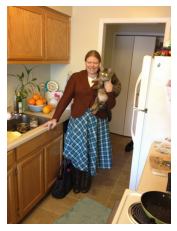

Young girl with helmet on hold on tight to her father driving the motorcycle.
Girl holding onto Dad on the back of a motorcycle in traffic.
A man an a girl riding a motorcycle on a city street.
A man riding on the back of a motorcycle.
a close up of two people riding a motorcycle


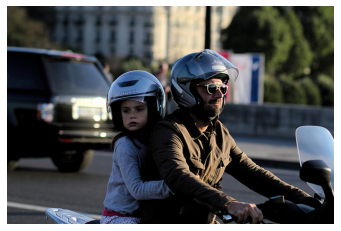

A woman in a striped dress feeding an elephant.
an image of a woman feeding an elephant
A woman feeding an elephant by hand with a handler standing by.
A small crowd of people petting large elephants.
A girl on vacation feeding a large elephant.


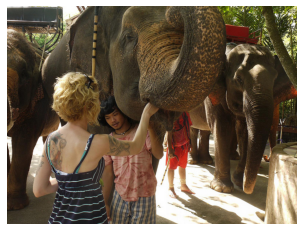

A man holding a baby in a room.
The man is holding his baby while she brushes her teeth. 
Middle aged man in a white tee shirt holding a toddler
a man with eye glasses holding a small child
A man is glasses is holding a girl putting something in her mouth.


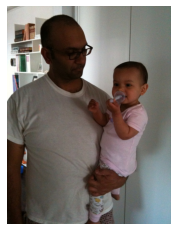

A dark skinned child getting ready to be pushed on a swing.
A girl getting pushed in a child's swing.
A man pushes a brightly smiling little girl on a swing.
a young girl on a swing being pushed by her dad
A man pushing a girl on a swing.


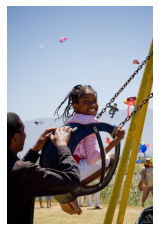

A young man kissing the top of a young woman's head.
The young man is kissing the young woman on top of her head.
A man kisses the top of a woman's head.
The man kisses the girl on the head as she laughs.
A man is kissing a woman on the top of the head.


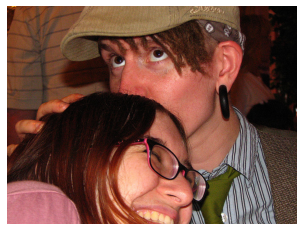

A woman holding a child wrapped in a towel brushing her teeth.
A woman is holding a baby who is wrapped in a towel and holding a toothbrush
A woman holding a little boy who is brushing his teeth.
A baby with a toothbrush in his mouth while being held by a woman
a close up of an adult holding a child brushing their teeth


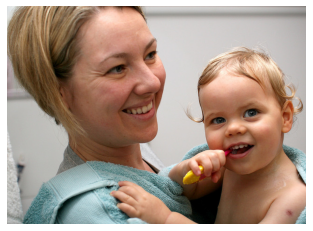

A man sitting in a chair with a woman cutting his hair.
A woman gives a sitting man a haircut.
A man cutting another mans hair in a bathroom.
A man sits in a bathroom while a woman cuts his hair.
A woman is cutting a man's hair in a bathroom.


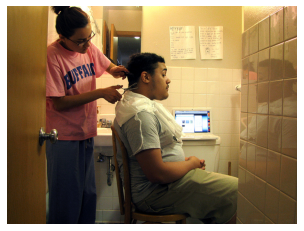

A man standing next to a girl eating a piece of cake.
A bride and groom eating a piece of their wedding cake.
The bride is feeding the groom there wedding cake .
The couple is sharing a piece of cake while being photographed. 
A bride feeding the groom a piece of cake as a photographer takes a picture.


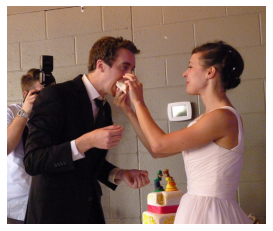

In [7]:
for img in active_imgs:
    show_originals(img,items, IMAGE_DIR)

# 1.2 Relative Clause

A man holding a baby in a room.
The man is holding his baby while she brushes her teeth. 
Middle aged man in a white tee shirt holding a toddler
a man with eye glasses holding a small child
A man is glasses is holding a girl putting something in her mouth.


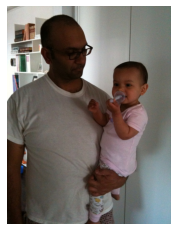

Young girl with helmet on hold on tight to her father driving the motorcycle.
Girl holding onto Dad on the back of a motorcycle in traffic.
A man an a girl riding a motorcycle on a city street.
A man riding on the back of a motorcycle.
a close up of two people riding a motorcycle


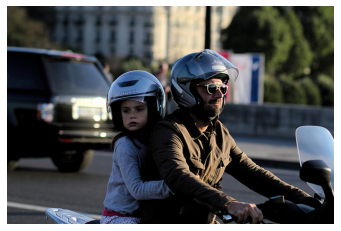

A man paddles a boat while his passenger relaxes in the back.
A man rowing a boat with a paddle as another man with a life vest looking on.
A man uses an oar as another man looks on
A couple of people that are in the water.
two males one is rowing some water and trees


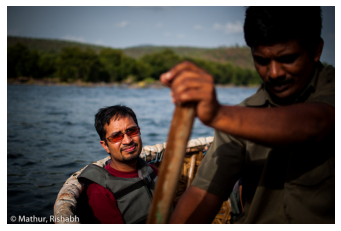

A young man kissing the top of a young woman's head.
The young man is kissing the young woman on top of her head.
A man kisses the top of a woman's head.
The man kisses the girl on the head as she laughs.
A man is kissing a woman on the top of the head.


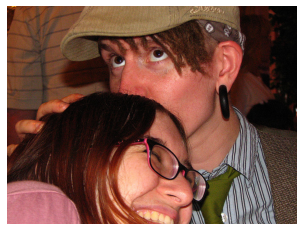

A man standing next to a woman near a street.
A woman talks to a man in a suit while he looks at his cell phone.
A man is assisting a woman in finding information via cell phone.
An older couple talking to one another while the man checks his cell phone.
A woman talking to a man who is looking at his cell phone.


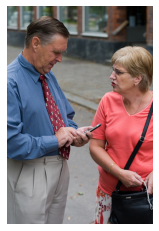

In [8]:
for img in relative_imgs:
    show_originals(img,items, IMAGE_DIR)

# 1.3 Coordination

A man holding a baby in a room.
The man is holding his baby while she brushes her teeth. 
Middle aged man in a white tee shirt holding a toddler
a man with eye glasses holding a small child
A man is glasses is holding a girl putting something in her mouth.


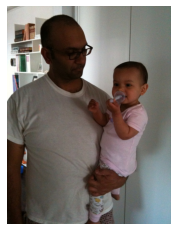

Young girl with helmet on hold on tight to her father driving the motorcycle.
Girl holding onto Dad on the back of a motorcycle in traffic.
A man an a girl riding a motorcycle on a city street.
A man riding on the back of a motorcycle.
a close up of two people riding a motorcycle


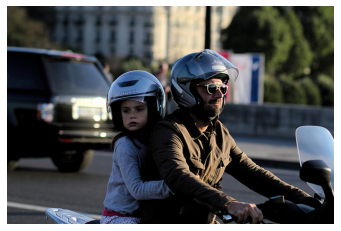

A man standing next to a woman near a street.
A woman talks to a man in a suit while he looks at his cell phone.
A man is assisting a woman in finding information via cell phone.
An older couple talking to one another while the man checks his cell phone.
A woman talking to a man who is looking at his cell phone.


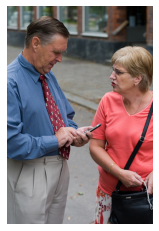

A man wearing a suit with a blue tie stands near a table that holds a large cake and a woman in black holds a knife to the top of the cake.
A man and woman standing next to a table posing while cutting a cake.
A woman cutting a cake sitting on top of a white table.
Elegantly dress man with woman cutting a ceremonial cake.
a man with a tie and eye glasses watching a woman


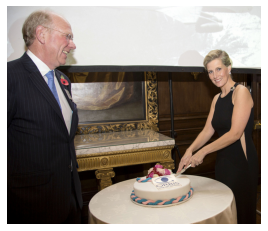

A man wearing a yellow bandanna holding a tennis racquet.
A man is running with a tennis racquet in his hand as a camera operator follows him.
A man running on a tennis court, racket in hand
A camera man wearing a red shirt aims his camera at a tennis player who is wearing a yellow bandanna and a blue shirt and a tennis racket.
To keep up with the action, the media people need to be as fast as the players.


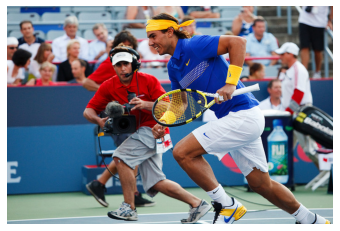

A young man kissing the top of a young woman's head.
The young man is kissing the young woman on top of her head.
A man kisses the top of a woman's head.
The man kisses the girl on the head as she laughs.
A man is kissing a woman on the top of the head.


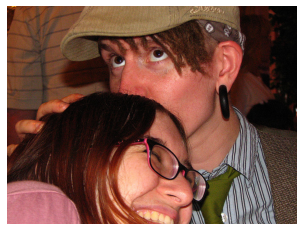

In [9]:
for img in coordination_imgs:
    show_originals(img,items, IMAGE_DIR)

# 1.4 Pronoun Binding

a gray kitten is resting on a round red  rug
The kitten is nesting inside the empty bowl.
Small grey cat sitting inside a little red bowl.
A cat licking itself while sitting in a bowl.
This is a cat sitting in a bowl.


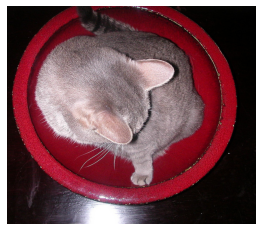

A couple of giraffe standing next to a tree in a field.
Two giraffes chewing on a tree while another giraffe licks himself. 
Two giraffes are near a tree in a green field.
A couple of giraffes feeding on a tree.
Three giraffes at the base of a tree.


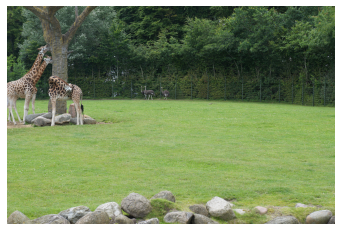

A group of giraffe standing next to each other
Here is an image of an zoo animals.
Two giraffes standing in the jungle lucking themselves
A giraffe licks itself and stands next to another giraffe
a couple of giraffes are standing near some trees


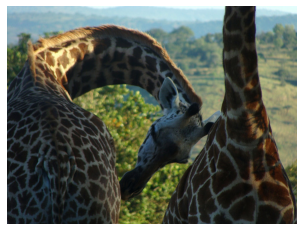

Two people sit with a small child, who is wearing a large hat, on a park bench.
Two parents on a bench with a little girl wearing a large hat. 
The woman adjusts the hat of her small child as a man holds the child's hand. 
Middle aged couple playing with toddler on bench in park.
Two parents are helping a baby put on a hat.


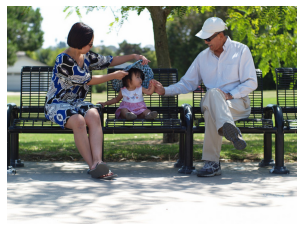

A man with a snowboard next to a man with a mask.
Man with snowboard standing next to another wearing a mask and crazy hands.
A man holding a snowboard next to a man in scary costume.
A man wearing a mask with a sbowboarder.
Snowboarder holding a pink board being hugged by man in costume. 


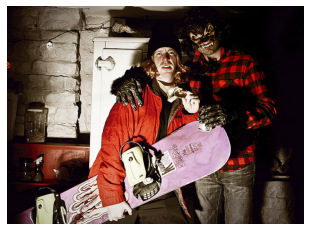

a person on a skate board getting pushed by someone else 
A man is being pushed on a skateboard by another man.
A man sitting on a skateboard with another man pushing him across a room.
One man is pushing another around on a skateboard.
A man is sitting on a skateboard and is being pushed by another man on it. 


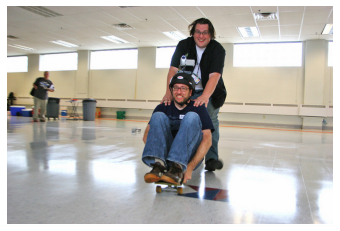

In [10]:
for img in pronoun_imgs:
    show_originals(img,items, IMAGE_DIR)